<a href="https://colab.research.google.com/github/spctr01/av/blob/main/AV_job_thon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [371]:
import pandas as pd 
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



### change dir

In [350]:
cd /content/drive/MyDrive/Colab Notebooks/competetion/jobthon

/content/drive/MyDrive/Colab Notebooks/competetion/jobthon


# Read data

In [396]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.drop(['ID'], axis=1, inplace= True)
test_data.drop(['ID'], axis=1, inplace= True)



# **EDA**

In [101]:

train_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [54]:
#train_data['City_Code'].unique() = 36
#train_data['Accomodation_Type'].unique() = 2

# train_data['Reco_Insurance_Type'].unique() = 2
#train_data['Is_Spouse'].unique() = 2
#train_data['Health Indicator'].unique() = 10
#train_data['Holding_Policy_Duration'].unique() = 15

#train_data['Holding_Policy_Type'].unique() = 5
#train_data['Reco_Policy_Cat'].unique() = 22



#### Balance of data

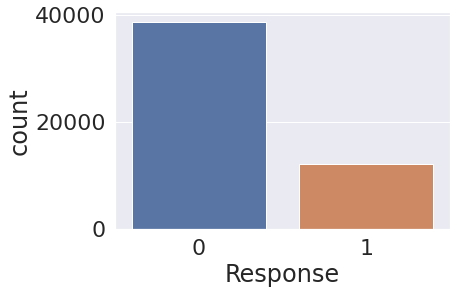

In [55]:
sns.countplot(train_data['Response'])

#### pandas profiling

In [56]:
profile = pp.ProfileReport(train_data, title='Pandas Profiling Report', explorative=True)
profile.to_file("profile.html")



Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
profile.to_notebook_iframe()

# Preprocessing

In [397]:
# print(train_data.shape)
# train_data = train_data.dropna(axis=0)
# print(train_data.shape)

In [398]:
train_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [399]:
test_data['Holding_Policy_Duration'] = test_data['Holding_Policy_Duration'].replace('14+', '15.0')
test_data['Holding_Policy_Duration'] = test_data['Holding_Policy_Duration'].astype(float)

train_data['Holding_Policy_Duration'] = train_data['Holding_Policy_Duration'].replace('14+', '15.0')
train_data['Holding_Policy_Duration'] = train_data['Holding_Policy_Duration'].astype(float)
train_data['Holding_Policy_Duration'].unique()

array([15., nan,  1.,  3.,  5.,  9., 14.,  7.,  2., 11., 10.,  8.,  6.,
        4., 13., 12.])

In [400]:
train_data['Health Indicator'] = train_data['Health Indicator'].replace(np.nan, 'none')
train_data['Health Indicator'].unique()

test_data['Health Indicator'] = train_data['Health Indicator'].replace(np.nan, 'none')
test_data['Health Indicator'].unique()

array(['X1', 'X2', 'none', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [401]:
enc = preprocessing.LabelEncoder()
hot_enc = preprocessing.OneHotEncoder()

cols = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse']
hot_cols = ['City_Code', 'Health Indicator', ]


train_data[cols] = train_data[cols].apply(enc.fit_transform)
df = pd.get_dummies(train_data, columns =hot_cols)

test_data[cols] = test_data[cols].apply(enc.fit_transform)
test_df = pd.get_dummies(test_data, columns =hot_cols)

df.head()


,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Health Indicator_none
0,3213,1,0,36,36,0,15.0,3.0,22,11628.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1117,0,1,75,22,0,NaN,NaN,22,30510.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3732,0,0,32,32,0,1.0,1.0,19,7450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4378,0,1,52,48,0,15.0,3.0,19,17780.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2190,1,0,44,44,0,3.0,1.0,16,10404.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


# ***EXp(test)***

In [357]:
df1 = df.drop(['Lower_Age'], axis=1)
test_df = test_df.drop(['Lower_Age'], axis=1)
#df1['average'] = df[['Upper_Age', 'Lower_Age']].mean(axis=1)
#df1 = df.drop(['Lower_Age'], axis=1)
#df1 = df.drop(['Upper_Age'], axis=1)


df = df1
df.head()


,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Health Indicator_none
0,3213,1,0,36,0,15.0,3.0,22,11628.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1117,0,1,75,0,NaN,NaN,22,30510.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3732,0,0,32,0,1.0,1.0,19,7450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4378,0,1,52,0,15.0,3.0,19,17780.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2190,1,0,44,0,3.0,1.0,16,10404.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [358]:
'''
cat boost =0.7624203821656051
[0.76415674 0.76391107 0.76391107 0.75617246 0.75297875]

lgbm
[0.76255988 0.76108586 0.76698194 0.75506695 0.7521189 ]
without
 0.7605384690969834
[[7693   45]
 [2392   47]]

drop lower age

0.7571976024368674
[[7662   24]
 [2447   44]]

drop uper age

0.7555271691068095
[[7652   22]
 [2466   37]]

adding aberage of lower and uper age
0.7586715141986833
[[7670   25]
 [2431   51]]

xgb


'''

'\ncat boost =0.7624203821656051\n\nwithout\n 0.7605384690969834\n[[7693   45]\n [2392   47]]\n\ndrop lower age\n\n0.7571976024368674\n[[7662   24]\n [2447   44]]\n\ndrop uper age\n\n0.7555271691068095\n[[7652   22]\n [2466   37]]\n\nadding aberage of lower and uper age\n0.7586715141986833\n[[7670   25]\n [2431   51]]\n\n'

# **Train test split**


In [402]:
x = df.drop('Response',axis = 1)
y = df['Response']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)


print('training data \n',y_train.value_counts())
print('test data \n',y_test.value_counts())

training data 
 0    30904
1     9801
Name: Response, dtype: int64
test data 
 0    7769
1    2408
Name: Response, dtype: int64


In [403]:
ss = StandardScaler()
scale = ['Reco_Policy_Premium','Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat', 'Region_Code','Upper_Age','Lower_Age']

features= ss.fit_transform(x_train[scale])
x_train[scale]= features
x_train.head()


#xtest = ss.transform(xtest)

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Health Indicator_none
36753,-1.165666,0,0,-1.144296,-1.020997,0,NaN,NaN,0.929462,-0.904580,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15666,-0.764331,1,0,-1.201983,-1.078678,0,-0.875203,-1.404341,0.771694,-1.466972,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12113,-1.032824,0,0,-0.798172,-0.674913,0,-1.085291,-1.404341,0.929462,-1.057711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
27988,-1.049693,1,0,-1.144296,-1.020997,0,NaN,NaN,0.929462,-0.485900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
25508,-0.253350,1,0,0.182512,0.305659,0,0.385322,-0.429435,0.298392,0.453546,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [409]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [ ]:
x_train.head()

# Model Buildung and Predicting


In [ ]:
!pip install catboost

In [417]:
y_train.value_counts()
print(30904/9801)

3.1531476379961227


In [423]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xg
import catboost as cb

model = xg.XGBClassifier(scale_pos_weight=0.2)
#model = xg.XGBClassifier(objective ='binary:logistic', random_state=12, verbose=0,
#                      n_estimators=500, max_depth = 10)

#model.fit(x_train,y_train)
scores = cross_val_score(model, x_train, y_train, scoring='accuracy',
                         cv=cv, n_jobs=-1)
print(scores)

[0.76255988 0.7615772  0.76587643 0.7545756  0.75150473]


In [ ]:
print(model.score(x_test, y_test))



pred = model.predict(x_test)
conf_mat = confusion_matrix(y_test, pred)
print (conf_mat)


#visualise confusion matrix with seaborn heat map
sns.set(font_scale = 2)
sns.heatmap(conf_mat, annot = True, cbar= False)
plt.xlabel('True')
plt.ylabel('Predicted')


In [364]:
pred = model.predict(test_df)
s = pd.read_csv('sample_submission.csv')
s['Response'] = pred
s.to_csv('sample_cat.csv', index = False)
s.head()



,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
